Following the video from https://www.youtube.com/watch?v=x58W9A2lnQc

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\mclea\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['vectorize']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [20]:
from numba import njit, vectorize
import numpy as np

In [4]:
def original_function(input_list):
    output_list = []
    for item in input_list:
        if item % 2 == 0:
            output_list.append(2)
        else:
            output_list.append(1)
    return output_list

In [24]:
test_array = np.arange(100000)

In [35]:
%time _ = original_function(test_array)

Wall time: 151 ms


In [36]:
jitted_function = njit()(original_function)

In [38]:
%time _ = jitted_function(test_array)

Wall time: 11 ms


In [32]:
@vectorize
def scalar_computation(num):
    if num % 2 == 0:
        return 2
    else:
        return 1

In [43]:
%time _ = scalar_computation(test_array)

Wall time: 0 ns


In [45]:
scalar_computation(test_array)

array([2, 1, 2, ..., 1, 2, 1], dtype=int64)

In [47]:
@njit
def fixed_function(input_list):
    output_list = np.zeros_like(input_list)
    for ii, item in enumerate(input_list):
        if item % 2 == 0:
            output_list[ii] = (2)
        else:
            output_list[ii] = (1)
    return output_list

In [49]:
%time _ = fixed_function(test_array)

Wall time: 0 ns


In [82]:
# Let's mix wet friction with dry friction, this makes the behavior
# of the system dependent on the initial condition, something
# may be interesting to study by running an exhaustive simluation

def friction_fn(v, vt):
    if v > vt:
        return - v * 3
    else:
        return - vt * 3 * np.sign(v)

def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

In [83]:
%time _ = simulate_spring_mass_funky_damper(0.1)

Wall time: 1.05 s


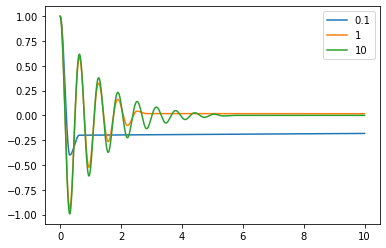

In [73]:
plot(*simulate_spring_mass_funky_damper(0.1))
plot(*simulate_spring_mass_funky_damper(1))
plot(*simulate_spring_mass_funky_damper(10))
legend(['0.1', '1', '10'])

In [84]:
@njit
def friction_fn(v, vt):
    if v > vt:
        return - v*3
    else:
        return - vt * 3 * np.sign(v)

@njit
def simulate_spring_mass_funky_damper(x0, T=10, dt=0.0001, vt=1.0):
    times = np.arange(0, T, dt)
    positions = np.zeros_like(times)
    
    v = 0
    a = 0
    x = x0
    positions[0] = x0/x0
    
    for ii in range(len(times)):
        if ii == 0:
            continue
        t = times[ii]
        a = friction_fn(v, vt) - 100*x
        v = v + a*dt
        x = x + v*dt
        positions[ii] = x/x0
    return times, positions

In [86]:
%time _ = simulate_spring_mass_funky_damper(0.1)

Wall time: 1.99 ms
